In [2]:
import numpy as np
import pandas as pd
import env
from env import get_db_url

 
url = get_db_url(env.user,env.host,env.password, 'employees')


In [3]:
# Once you have successfully run a query:

from sqlalchemy import text, create_engine

engine = create_engine(url)

query = text('SELECT * FROM employees LIMIT 5 OFFSET 50')

pd.read_sql(query, engine.connect())




,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [4]:
# a. Intentionally make a typo in the database url. What kind of error message do you see? 

print(f'Typo in database URL created an Attribute Error')

Typo in database URL created an Attribute Error


In [5]:
# b. Intentionally make an error in your SQL query. What does the error message look like?

print(f'Error in SQL Query looks like programming error database/table non existent')

Error in SQL Query looks like programming error database/table non existent


In [6]:
# Read the employees and titles tables into two separate DataFrames.
print(f'employees dataframe')

employees_df = pd.read_sql("SELECT * FROM employees", engine)

employees_df.shape



employees dataframe


(300024, 6)

In [7]:
print(f'Titles dataframe')
titles_df = pd.read_sql("SELECT * FROM titles", engine)

titles_df.shape
      

Titles dataframe


(443308, 4)

In [8]:
# How many rows and columns do you have in each DataFrame? Is that what you expected?
employees_rows, employees_columns = employees_df.shape
titles_rows, titles_columns = titles_df.shape

print(f'there are {employees_rows} rows and {employees_columns} columns in the employees df')
print(f'there are {titles_rows} rows and {titles_columns} columns in the employees df')

there are 300024 rows and 6 columns in the employees df
there are 443308 rows and 4 columns in the employees df


In [9]:
# Display the summary statistics for each DataFrame.

employees_df.describe()

,emp_no
count,300024.000000
mean,253321.763392
std,161828.235540
min,10001.000000
25%,85006.750000
50%,249987.500000
75%,424993.250000
max,499999.000000


In [10]:
titles_df.describe()

,emp_no
count,443308.000000
mean,253075.034430
std,161853.292613
min,10001.000000
25%,84855.750000
50%,249847.500000
75%,424891.250000
max,499999.000000


In [11]:
# How many unique titles are in the titles DataFrame?

unique_title_count = titles_df['title'].nunique()
print(f'there are {unique_title_count} unique titles in the titles df')

there are 7 unique titles in the titles df


In [12]:
# What is the oldest date in the to_date column?

oldest_to_date = titles_df['to_date'].min()
print(f'the oldest to date is {oldest_to_date} in the titles df')

the oldest to date is 1985-03-01 in the titles df


In [13]:
# What is the most recent date in the to_date column?

most_recent_to_date = titles_df['to_date'].max()
print(f'the most recent to date in the titles df is {most_recent_to_date}')

the most recent to date in the titles df is 9999-01-01


In [14]:
print(f'EXERCISES 2')

# Copy the users and roles DataFrames from the examples above.

# Create the users DataFrame.

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users




EXERCISES 2


,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [15]:
# Create the roles DataFrame

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [16]:
# What is the result of using a right join on the DataFrames?


users.merge(roles, left_on='role_id', right_on='id', how='right')


,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [17]:
# What is the result of using an outer join on the DataFrames?

users.merge(roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [18]:
# What happens if you drop the foreign keys from the DataFrames and try to merge them?

print(f'wonkiness, no foreign keys = inaccurate results')

wonkiness, no foreign keys = inaccurate results


In [19]:
from pydataset import data
data('mpg', show_doc=True)
df_mpg = data('mpg')

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [20]:
# How many rows and columns are in the dataset?

df_mpg.shape


(234, 11)

In [21]:
# Check out your column names and perform any cleanup you may want on them.

column_names_df = pd.DataFrame(df_mpg.columns, columns=["Column Names"])

print(column_names_df)

    Column Names
0   manufacturer
1          model
2          displ
3           year
4            cyl
5          trans
6            drv
7            cty
8            hwy
9             fl
10         class


In [22]:
# Display the summary statistics for the dataset.

df_mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [26]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [27]:
# How many different manufacturers are there?

df_mpg['manufacturer'].nunique()
print(f'there are {df_mpg["manufacturer"].nunique()} different manufacturers')

there are 15 different manufacturers


In [28]:
# How many different models are there?
df_mpg['model'].nunique()
print(f'there are {df_mpg["model"].nunique()} different models')

there are 38 different models


In [29]:
# Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain the 
# difference between highway and city mileage for each car.

df_mpg['mileage_difference'] = df_mpg.hwy - df_mpg.cty
df_mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10


In [182]:
# Create a column named average_mileage like you did in the DataFrames exercises; this is the mean of the city and 
# highway mileage.

df_mpg['average_mileage'] = df_mpg[['cty','hwy']].mean(axis=1)
df_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,is_automatic,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True,21.0


In [183]:
# Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car has 
# an automatic transmission.

df_mpg['is_automatic']= np.where(df_mpg.trans.str.startswith('a'),True,False)
df_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,is_automatic,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True,21.0


In [188]:
# Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average?

# Group the DataFrame by 'manufacturer' and calculate the mean of 'average_mileage'
manufacturer_avg_mileage = df_mpg.groupby('manufacturer')['average_mileage'].mean()

# print(manufacturer_avg_mileage)

# Sort the results in descending order to find the manufacturer with the highest average mileage
best_manufacturer = manufacturer_avg_mileage.sort_values(ascending=False).head(1)

print(f"The manufacturer with the best average miles per gallon is: {best_manufacturer.index[0]}")


The manufacturer with the best average miles per gallon is: honda


In [196]:
# Do automatic or manual cars have better miles per gallon?
# Calculate the average MPG for automatic and manual cars
# average_mpg_by_transmission = 
df_mpg.groupby('is_automatic')['average_mileage'].mean().round(2)


# Print the average MPG for both transmission types
# print(average_mpg_by_transmission)



is_automatic
False    22.23
True     19.13
Name: average_mileage, dtype: float64

In [34]:
# #Fancy ChatGPT stuff
# # Extract the subcategories from the 'trans' column
# df_mpg['subcat'] = df_mpg['trans'].str.extract(r'\(([^)]+)\)')

# # Calculate the average MPG for 'auto' and 'manual' by grouping based on the 'subcat' column
# average_mpg_by_subcategory = df_mpg.groupby(['subcat'])['average_mileage'].mean()

# # Calculate the average MPG for 'auto' and 'manual'
# average_mpg_auto = average_mpg_by_subcategory.loc['auto'].mean()
# average_mpg_manual = average_mpg_by_subcategory.loc['manual'].mean()

# # Print the average MPG for 'auto' and 'manual'
# print(f"Average MPG for automatic cars: {average_mpg_auto}")
# print(f"Average MPG for manual cars: {average_mpg_manual}")

In [143]:
# Use your get_db_url function to help you explore the data from the chipotle database.

import env
from env import get_db_url
# Call the get_db_url function with the desired database name
chip_url = get_db_url(env.user, env.host, env.password,'chipotle')

chipotle_df = pd.read_sql('SELECT * FROM orders', chip_url)
chipotle_df.head(5)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [144]:
chipotle_df.head(10)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
6,7,3,1,Side of Chips,nan,$1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25


In [198]:
# What is the total price for each order?

# chipotle_df['item_price']= 
chipotle_df['item_price']= chipotle_df['item_price'].replace('$', '')
chipotle_df['item_price']= chipotle_df['item_price'].astype(float)


chipotle_df


# # Calculate the total price for each order
# total_price_per_order = 
chipotle_df.groupby('order_id')[['item_price']].sum()
# chipotle_df.groupby('order_id').sum().item_price

# # Print the result
# print(total_price_per_order)


,item_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


<Axes: ylabel='item_name'>

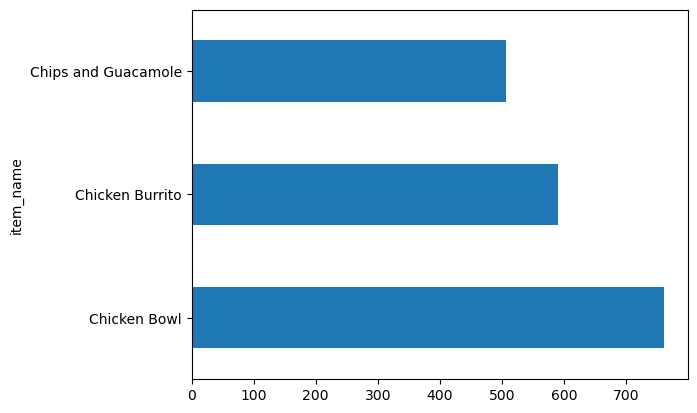

In [202]:
# What are the most popular 3 items?

# Group the data by 'item_name' and calculate the total quantity sold for each item
# item_popularity = 
# chipotle_df.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(3)
chipotle_df.groupby(['item_name']).sum().quantity.nlargest(3).plot.barh()

# Sort the items in descending order based on quantity and take the top 3
# top_3_items = 
# item_popularity.sort_values(ascending=False).head(3)

# # Print the top 3 items
# print(top_3_items)


In [203]:
# Which item has produced the most revenue?

# Calculate the revenue for each item
# Group the data by 'item_name' and calculate the total revenue for each item
(chipotle_df['item_price'] * chipotle_df['quantity']).groupby(chipotle_df['item_name']).sum().sort_values\
(ascending=False).head(1)





item_name
Chicken Bowl    8044.63
dtype: float64

In [164]:
# Join the employees and titles DataFrames together.


# Merge the DataFrames based on the 'emp_no' column
merged_df = employees_df.merge(titles_df, on='emp_no', how='inner')

merged_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [171]:
# For each title, find the hire date of the employee that was hired most recently with that title.
merged_df.groupby('title')[['hire_date','first_name','last_name']].max()

,hire_date,first_name,last_name
title,,,
Assistant Engineer,1999-12-24,Zvonko,dAstous
Engineer,2000-01-28,Zvonko,dAstous
Manager,1992-02-05,Yuchang,Zhang
Senior Engineer,2000-01-01,Zvonko,dAstous
Senior Staff,2000-01-13,Zvonko,dAstous
Staff,2000-01-12,Zvonko,dAstous
Technique Leader,1999-12-31,Zvonko,dAstous


In [212]:
# Write the code necessary to create a cross tabulation of the number of titles by department. 
# (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform 
#  the manipulations.)

# SQL query to retrieve department and title information
emp_url = get_db_url(env.user, env.host, env.password, 'employees')

pd.read_sql('show tables', emp_url)

query = """
SELECT *
FROM dept_emp
    join departments
            using (dept_no)
"""



In [214]:
df_depts = pd.read_sql(query, url)
df_depts.head()

,dept_no,emp_no,from_date,to_date,dept_name
0,d009,10011,1990-01-22,1996-11-09,Customer Service
1,d009,10038,1989-09-20,9999-01-01,Customer Service
2,d009,10049,1992-05-04,9999-01-01,Customer Service
3,d009,10060,1992-11-11,9999-01-01,Customer Service
4,d009,10088,1992-03-21,9999-01-01,Customer Service


In [227]:
merged_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [225]:
df_all = pd.merge(merged_df, df_depts, how='inner', on='emp_no')
df_all.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,d005,1986-06-26,9999-01-01,Development
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,d007,1996-08-03,9999-01-01,Sales
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,d004,1995-12-03,9999-01-01,Production
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,d004,1986-12-01,9999-01-01,Production
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,d004,1986-12-01,9999-01-01,Production


In [230]:
pd.crosstab(df_all.title, df_all.dept_name)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,298,7769,0,0,0,6445,1831,378,0
Engineer,2362,58135,0,0,0,49649,13852,2986,0
Manager,4,2,2,2,2,4,4,2,2
Senior Engineer,2027,49326,0,0,0,42205,11864,2570,0
Senior Staff,13925,1247,12139,12274,13940,1270,0,11637,36191
Staff,16150,1424,13929,14342,16196,1478,0,13495,41808
Technique Leader,309,7683,0,0,0,6557,1795,393,0
